# 1.Contents : WordCloud (블로그 키워드 : 댕댕여행, 애완견여행, 애완동물여행)
# 2. 라이브러리 가져오기


In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import re
import soynlp
sns.set_style('whitegrid', {'grid.linestyle':'--'})
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import datetime as dt
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
pd.options.display.max_columns=None

# 3.데이터 불러오기(여행관련키워드)

In [4]:
path = glob.glob('./data/네이버api/*.*')
for i in range(len(path)):
    print(i, path[i])

0 ./data/네이버api\naver_애완동물_news_title_year.csv
1 ./data/네이버api\블로그_(0623)naver_댕댕.csv
2 ./data/네이버api\블로그_(0627)naver_댕댕.csv
3 ./data/네이버api\블로그_(0627)naver_댕댕_여행.csv
4 ./data/네이버api\블로그_(0627)naver_반려동물.csv
5 ./data/네이버api\블로그_(0627)naver_애완견.csv
6 ./data/네이버api\블로그_(0627)naver_애완견_여행.csv
7 ./data/네이버api\블로그_(0627)naver_애완동물.csv
8 ./data/네이버api\블로그_(0627)naver_애완동물_여행.csv


In [5]:
df1 = pd.read_csv(path[3], encoding = 'utf-8', index_col = 0, parse_dates = ['postdate'])
df2 = pd.read_csv(path[4], encoding = 'utf-8', index_col = 0, parse_dates = ['postdate'])
df3 = pd.read_csv(path[5], encoding = 'utf-8', index_col = 0, parse_dates = ['postdate'])

# 4. 데이터 합치기

In [6]:
df = pd.concat([df1, df2, df3])
df

Title   postdate
0                    +춘천,가평여행 애완견 동반 식당 호원닭갈비 2021-09-28
1         [애완동물] 애완견과 함께하는 자동차 여행/안전한 여행에...  2022-04-06
2             여행에 동반한 애완견 &amp; 고창 장어 맛집 금단양만 2021-07-24
3    포항 [ 영일대 해수욕장 ] 여행 애완견과 차박하기 좋은 곳 예쁜...  2021-11-14
4           강릉여행 / 세인트존스 호텔 숙박후기 (애완견 동반가능호텔) 2021-12-19
..                                        ...        ...
995                 고강동애완견호텔 강아지가 구석에 숨는 이유는? 2022-05-02
996   Dog Wash 셀프 애완견 목욕탕:더욱 쉽게 강아지 목욕시킬수...  2013-05-23
997         애완견 미용하기/바비온 이발기/ 우리집 치와와 미용했어요~~ 2019-08-05
998                     (삼진아웃-개 사형) 애완견 산책 금지 2020-11-22
999                애완견과 공원산책패션 배레모+빈티지UGG어그부츠 2014-10-22

[3000 rows x 2 columns]

# 5. 날짜별 파생변수

In [7]:
df = df.rename(columns = {'postdate':'date'})
df

Title       date
0                    +춘천,가평여행 애완견 동반 식당 호원닭갈비 2021-09-28
1         [애완동물] 애완견과 함께하는 자동차 여행/안전한 여행에...  2022-04-06
2             여행에 동반한 애완견 &amp; 고창 장어 맛집 금단양만 2021-07-24
3    포항 [ 영일대 해수욕장 ] 여행 애완견과 차박하기 좋은 곳 예쁜...  2021-11-14
4           강릉여행 / 세인트존스 호텔 숙박후기 (애완견 동반가능호텔) 2021-12-19
..                                        ...        ...
995                 고강동애완견호텔 강아지가 구석에 숨는 이유는? 2022-05-02
996   Dog Wash 셀프 애완견 목욕탕:더욱 쉽게 강아지 목욕시킬수...  2013-05-23
997         애완견 미용하기/바비온 이발기/ 우리집 치와와 미용했어요~~ 2019-08-05
998                     (삼진아웃-개 사형) 애완견 산책 금지 2020-11-22
999                애완견과 공원산책패션 배레모+빈티지UGG어그부츠 2014-10-22

[3000 rows x 2 columns]

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [9]:
df.head(2)

Title       date  year  month  day
0             +춘천,가평여행 애완견 동반 식당 호원닭갈비 2021-09-28  2021      9   28
1  [애완동물] 애완견과 함께하는 자동차 여행/안전한 여행에...  2022-04-06  2022      4    6

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   3000 non-null   object        
 1   date    3000 non-null   datetime64[ns]
 2   year    3000 non-null   int64         
 3   month   3000 non-null   int64         
 4   day     3000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 140.6+ KB


In [11]:
df['YM'] = df['year'].astype(str) + '-' + df['month'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   3000 non-null   object        
 1   date    3000 non-null   datetime64[ns]
 2   year    3000 non-null   int64         
 3   month   3000 non-null   int64         
 4   day     3000 non-null   int64         
 5   YM      3000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 164.1+ KB


# 6. EDA?

In [13]:
df.groupby('year')['Title'].count().sort_values(ascending = False)

year
2022    987
2021    450
2020    240
2016    191
2018    184
2017    175
2019    165
2015    153
2014    117
2013    105
2012     71
2011     44
2010     38
2009     30
2008     18
2004     11
2007     10
2006      7
2005      3
1990      1
Name: Title, dtype: int64

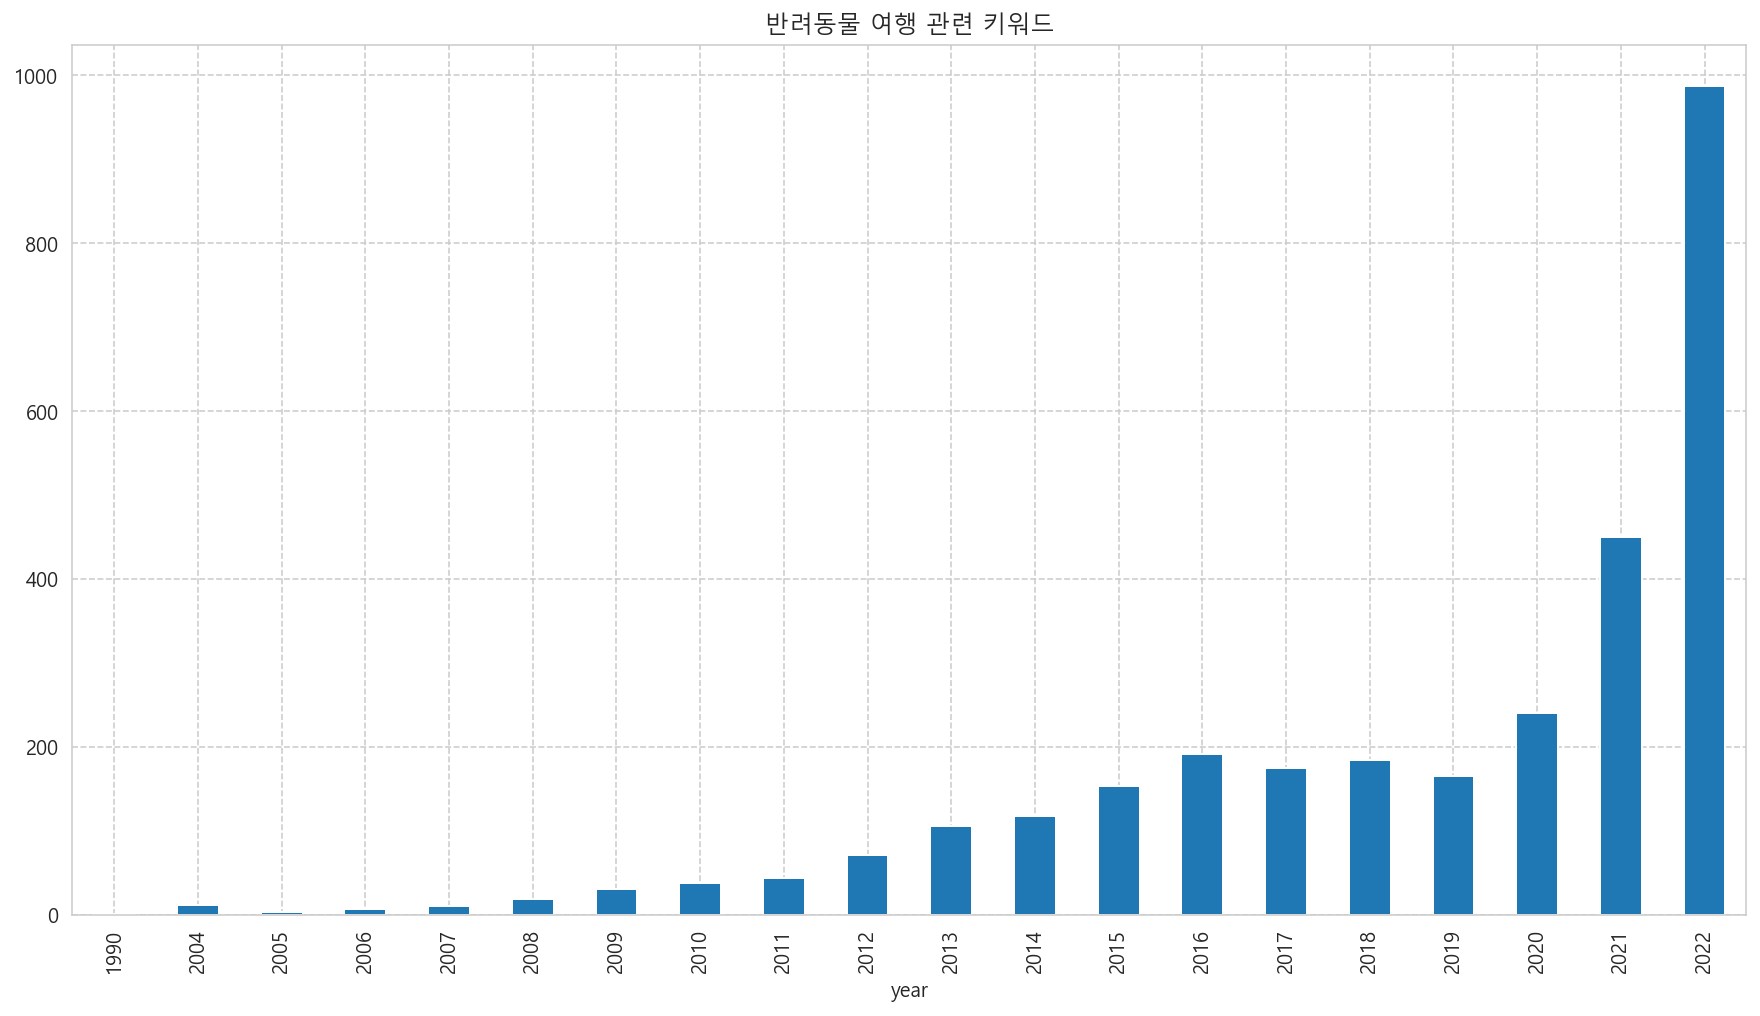

In [50]:
plt.figure(figsize = (15,8))
df.groupby('year')['Title'].count().plot.bar()
plt.title('반려동물 여행 관련 키워드')
plt.show()

In [15]:
df.groupby('YM')['Title'].count().sort_index().tail(30)

YM
2020-1      18
2020-10     18
2020-11     19
2020-12     26
2020-2      18
2020-3      24
2020-4      13
2020-5      33
2020-6      13
2020-7      17
2020-8      20
2020-9      21
2021-1      20
2021-10     59
2021-11     79
2021-12     91
2021-2       8
2021-3      23
2021-4      17
2021-5      31
2021-6      17
2021-7      20
2021-8      28
2021-9      57
2022-1      98
2022-2      82
2022-3     117
2022-4     136
2022-5     251
2022-6     303
Name: Title, dtype: int64

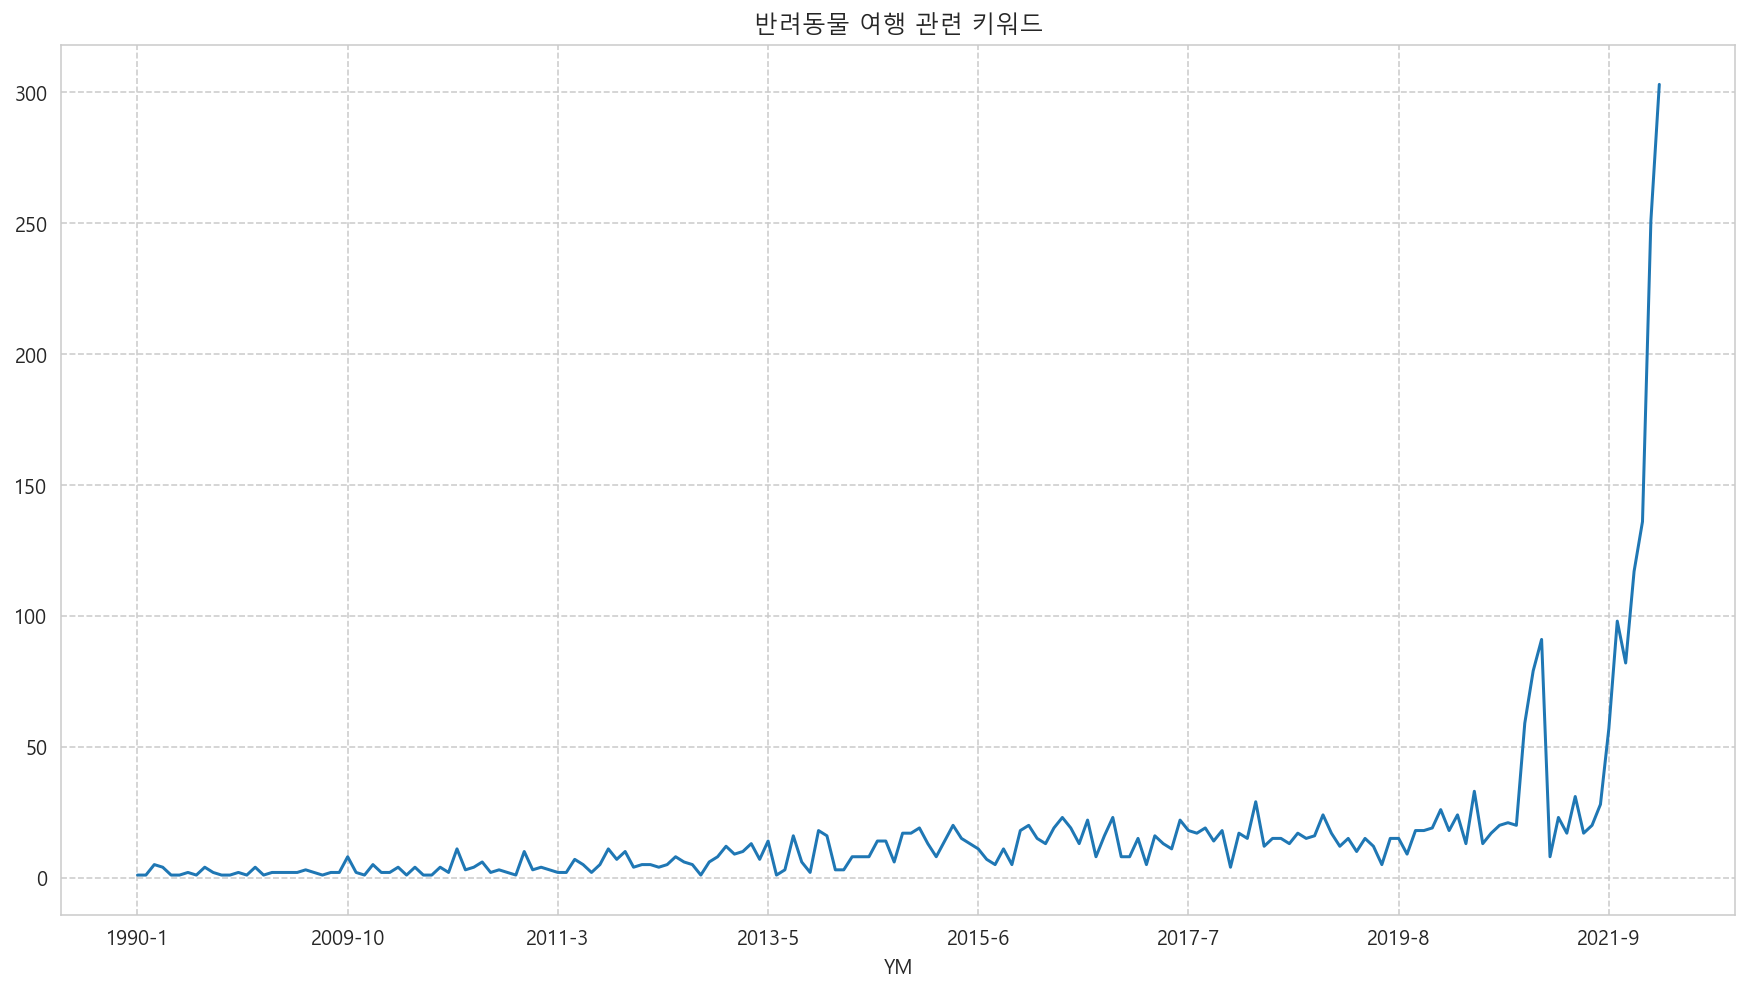

In [51]:
plt.figure(figsize = (15,8))
df.groupby('YM')['Title'].count().sort_index().plot()
plt.title('반려동물 여행 관련 키워드')
plt.show()

# 7. 전체데이터 확인

In [17]:
df

Title       date  year  month  day  \
0                    +춘천,가평여행 애완견 동반 식당 호원닭갈비 2021-09-28  2021      9   28   
1         [애완동물] 애완견과 함께하는 자동차 여행/안전한 여행에...  2022-04-06  2022      4    6   
2             여행에 동반한 애완견 &amp; 고창 장어 맛집 금단양만 2021-07-24  2021      7   24   
3    포항 [ 영일대 해수욕장 ] 여행 애완견과 차박하기 좋은 곳 예쁜...  2021-11-14  2021     11   14   
4           강릉여행 / 세인트존스 호텔 숙박후기 (애완견 동반가능호텔) 2021-12-19  2021     12   19   
..                                        ...        ...   ...    ...  ...   
995                 고강동애완견호텔 강아지가 구석에 숨는 이유는? 2022-05-02  2022      5    2   
996   Dog Wash 셀프 애완견 목욕탕:더욱 쉽게 강아지 목욕시킬수...  2013-05-23  2013      5   23   
997         애완견 미용하기/바비온 이발기/ 우리집 치와와 미용했어요~~ 2019-08-05  2019      8    5   
998                     (삼진아웃-개 사형) 애완견 산책 금지 2020-11-22  2020     11   22   
999                애완견과 공원산책패션 배레모+빈티지UGG어그부츠 2014-10-22  2014     10   22   

          YM  
0     2021-9  
1     2022-4  
2     2021-7  
3    2021-11  
4    2021-12  
..       ...  
995   2022-5  
996   2013-5  
997   2019-8  
998  2020-11  
999  2014-10  

[3000 rows x 6 columns]

# 8.WordCloud

In [18]:
from soynlp.noun import LRNounExtractor

## (1) 명사추출

In [19]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(df['Title'])
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1373, 949) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 130 nouns are extracted
Wall time: 169 ms


In [20]:
nouns

{'애견': NounScore_v1(frequency=115, score=0.999913, known_r_ratio=0.019230769230769232),
 '사랑': NounScore_v1(frequency=40, score=0.9592258965517242, known_r_ratio=1.0),
 '사람': NounScore_v1(frequency=15, score=0.9997745, known_r_ratio=0.6666666666666666),
 '하루': NounScore_v1(frequency=5, score=0.9988480000000001, known_r_ratio=1.0),
 '품종': NounScore_v1(frequency=11, score=0.9996703333333334, known_r_ratio=1.0),
 '제주': NounScore_v1(frequency=133, score=0.505755, known_r_ratio=0.7522935779816514),
 '생각': NounScore_v1(frequency=12, score=0.990019, known_r_ratio=1.0),
 '가정': NounScore_v1(frequency=8, score=0.9997135, known_r_ratio=0.5),
 '훈련': NounScore_v1(frequency=8, score=0.999913, known_r_ratio=0.5),
 '카페': NounScore_v1(frequency=100, score=0.997334, known_r_ratio=0.3333333333333333),
 '유럽': NounScore_v1(frequency=7, score=0.999707, known_r_ratio=0.6),
 '시간': NounScore_v1(frequency=8, score=0.999185, known_r_ratio=0.6666666666666666),
 '테마': NounScore_v1(frequency=5, score=0.999605, know

In [21]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun = df['Title'].apply(preprocess)

In [22]:
df_noun

0                      +춘천,가평여행 애완견 동반 식당 호원닭갈비
1           [애완동물] 애완견과 함께하는 자동차 여행/안전한 여행에... 
2               여행에 동반한 애완견 &amp; 고창 장어 맛집 금단양만
3      포항 [ 영일대 해수욕장 ] 여행 애완견과 차박하기 좋은 곳 예쁜... 
4             강릉여행 / 세인트존스 호텔 숙박후기 (애완견 동반가능호텔)
                         ...                   
995                   고강동애완견호텔 강아지가 구석에 숨는 이유는?
996     Dog Wash 셀프 애완견 목욕탕:더욱 쉽게 강아지 목욕시킬수... 
997           애완견 미용하기/바비온 이발기/ 우리집 치와와 미용했어요~~
998                       (삼진아웃-개 사형) 애완견 산책 금지
999                  애완견과 공원산책패션 배레모+빈티지UGG어그부츠
Name: Title, Length: 3000, dtype: object

In [53]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [54]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [82]:
#불용어 설정
stopwords_kr = ['여행','애완동물','애완견', 'quot','lt', '반려견','반려동물', '애견', '강아지', '댕댕', 
                '애견수제간식', '수제간식', 'gt', 'amp', '반려동물 수제간식', '강아지케이크', '강아지수제간식'
               , '애완견과', '함께하는', '동반', '애완동물과', '수 있는', '함께', '애견동반', '애완견을',
               '애완 동물', '고양이','여행을', '애완견동반', '좋은', '가능한', '애완견분양', '애완견이', '애완견의'
               , '애완견간식', '분양', '애완견은', '추천', '가능']

In [26]:
from wordcloud import WordCloud

Wall time: 0 ns


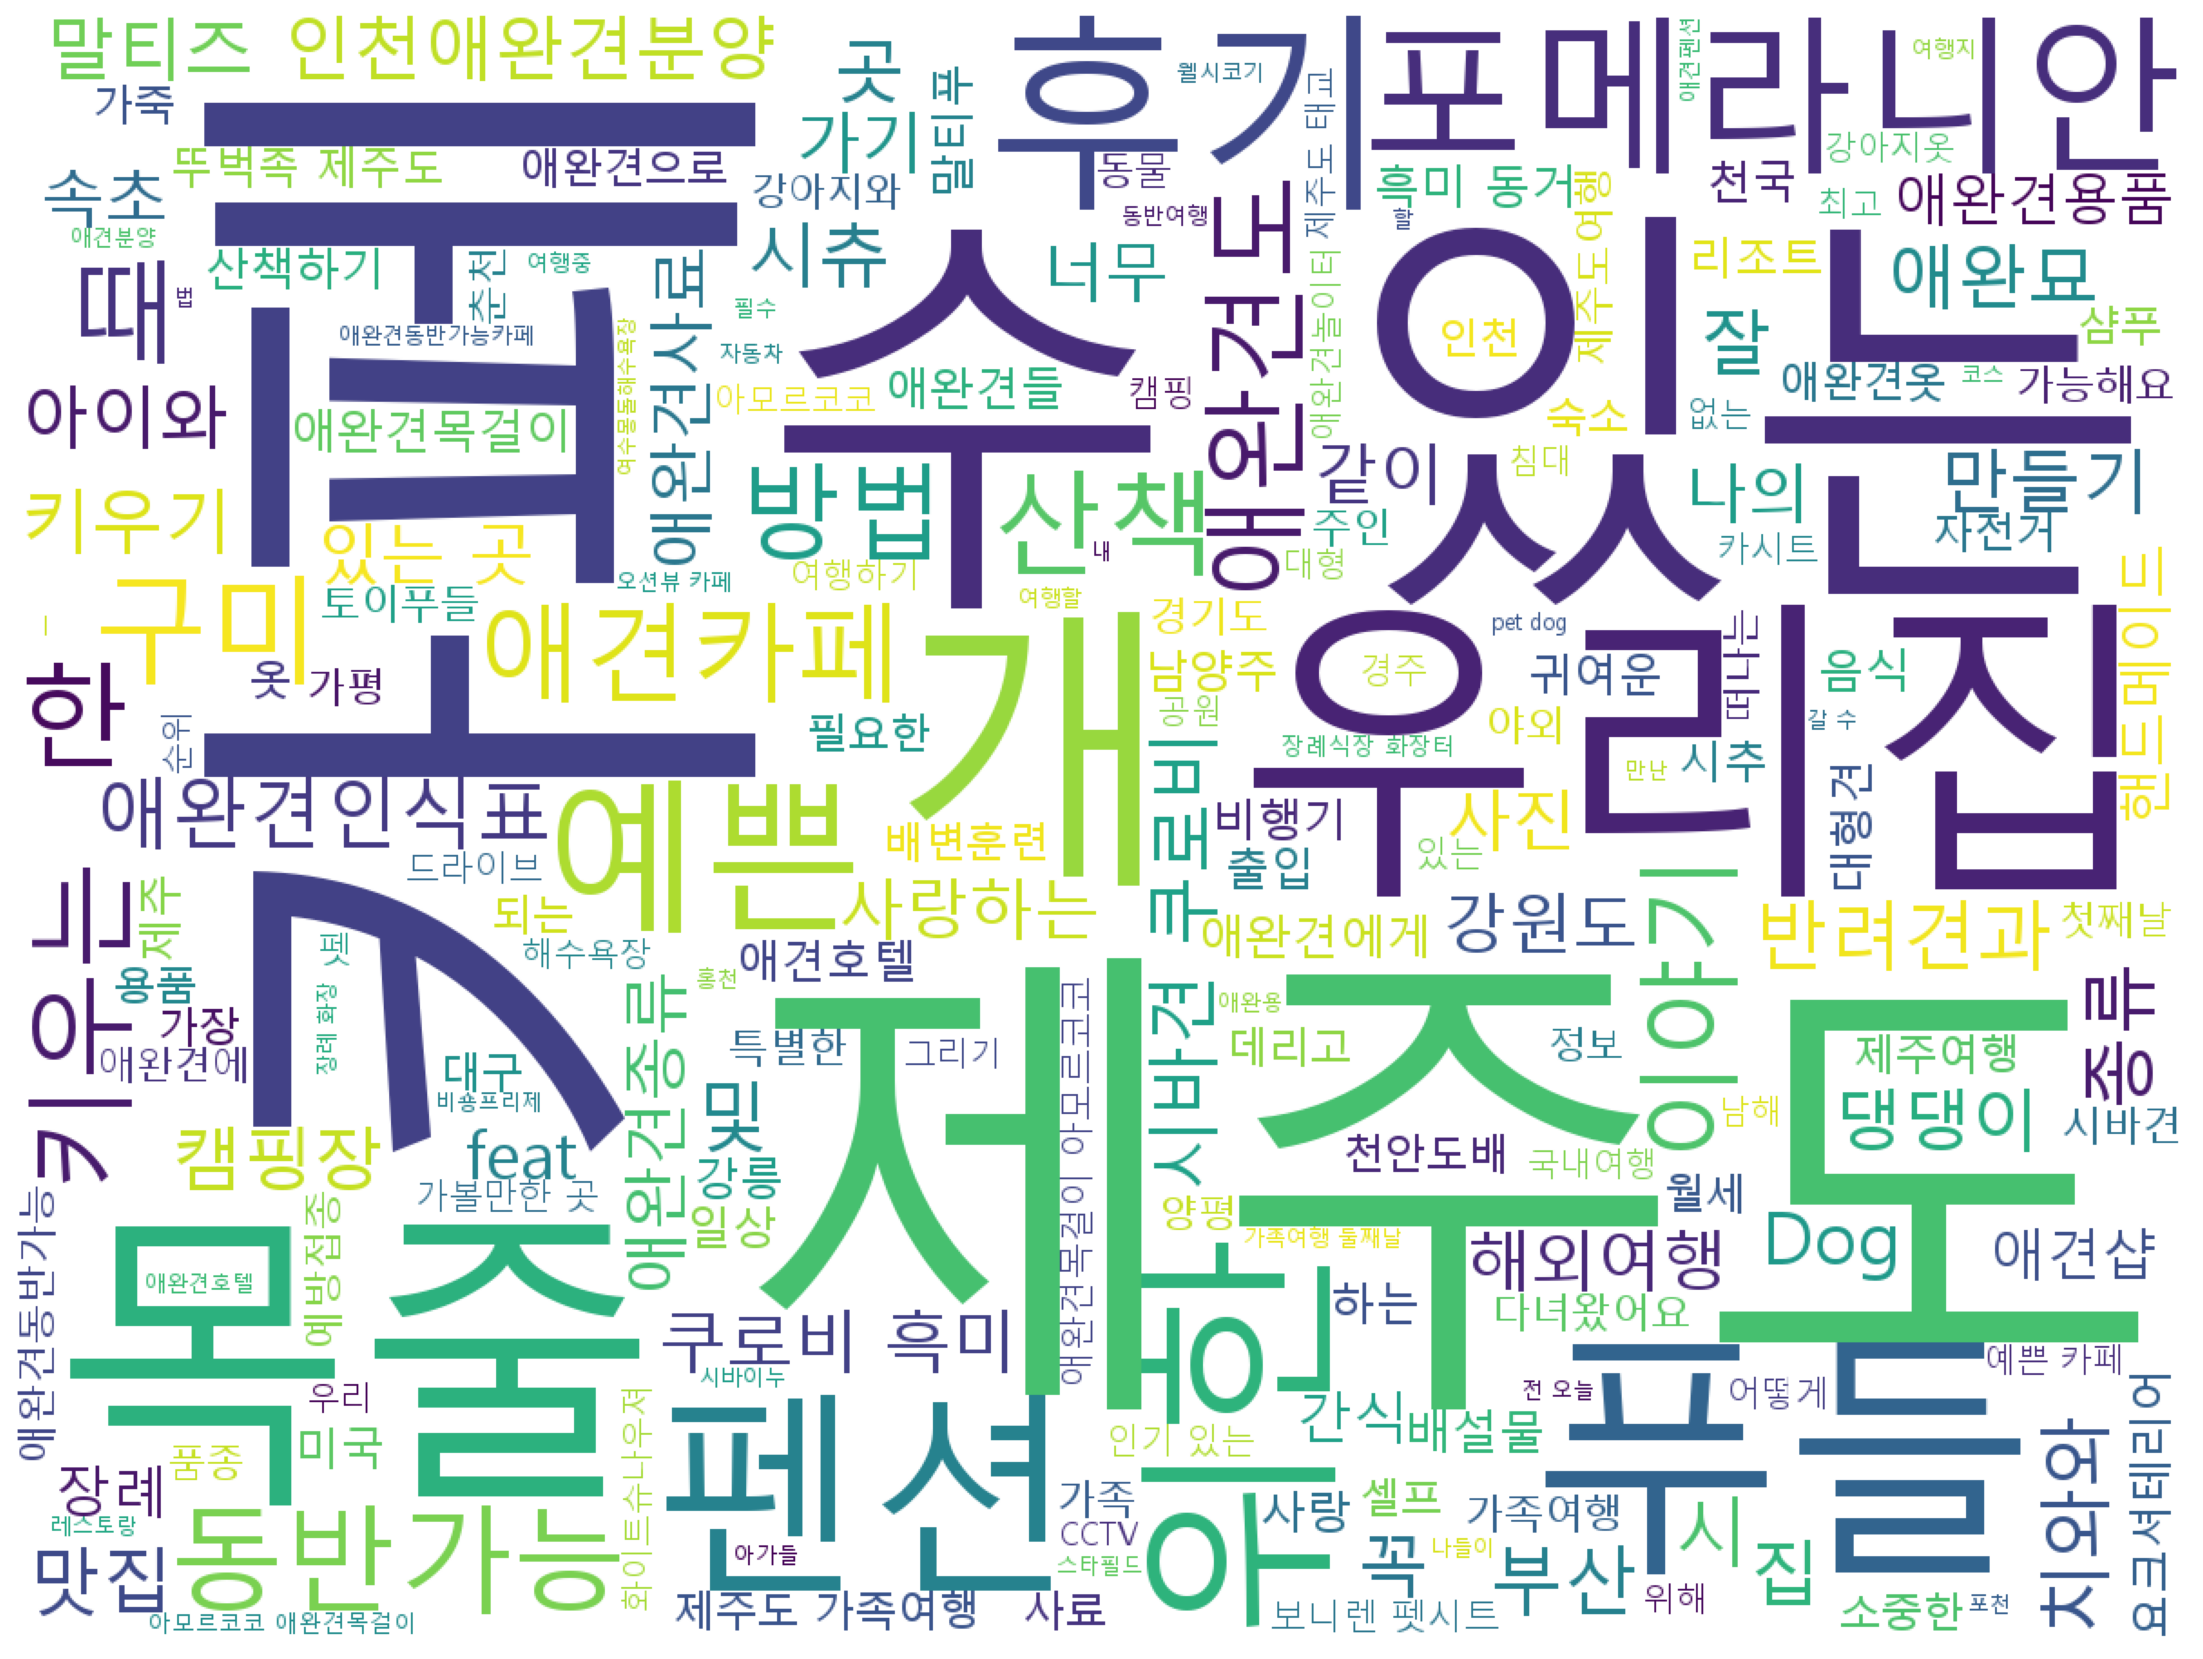

In [83]:
%time 
dang_trip_cloud = displayWordCloud(' '.join(df_noun))
dang_trip_cloud

# 9.연도별쪼개기(22,21,20,19)

In [59]:
blog_trip_22 = df[df['year'] == 2022]['Title']
blog_trip_21 = df[df['year'] == 2021]['Title']
blog_trip_20 = df[df['year'] == 2020]['Title']
blog_trip_19 = df[df['year'] == 2019]['Title']


## (1)22년 명사추출

In [84]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(blog_trip_22)
nouns_22 = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (544, 390) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 38 nouns are extracted
Wall time: 52.2 ms


In [85]:
nouns_22

{'중요': NounScore_v1(frequency=8, score=0.9988376666666667, known_r_ratio=0.75),
 '분양': NounScore_v1(frequency=8, score=0.6689273333333333, known_r_ratio=1.0),
 '아이': NounScore_v1(frequency=5, score=0.99902375, known_r_ratio=0.8),
 '동반': NounScore_v1(frequency=66, score=0.9994683333333333, known_r_ratio=0.16666666666666666),
 '사랑': NounScore_v1(frequency=12, score=0.8935658, known_r_ratio=1.0),
 '사람': NounScore_v1(frequency=8, score=0.9995925, known_r_ratio=0.6666666666666666),
 '주인': NounScore_v1(frequency=3, score=0.9997400000000001, known_r_ratio=1.0),
 '편안': NounScore_v1(frequency=4, score=0.9960990000000001, known_r_ratio=1.0),
 '제주': NounScore_v1(frequency=19, score=0.505755, known_r_ratio=0.5),
 '생각': NounScore_v1(frequency=6, score=0.990271, known_r_ratio=1.0),
 '가정': NounScore_v1(frequency=7, score=0.9997135, known_r_ratio=0.5714285714285714),
 '봉봉': NounScore_v1(frequency=5, score=0.999185, known_r_ratio=0.4),
 '입양': NounScore_v1(frequency=6, score=0.7469935, known_r_ratio=1.0

In [86]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun_22 = blog_trip_22.apply(preprocess)

In [87]:
df_noun_22

1        [애완동물] 애완견과 함께하는 자동차 여행/안전한 여행에... 
7            Lifelog.Blog [구례여행]구례 애완견펜션 뷰조은
9       원주여행 가볼만한곳 산 속 정원 힐링카페 사니다카페 애완견... 
11         드라이브 추천_마장호수, 레드 브리지 카페 애완견 동반 여행
14       5사단 펜션 28사단 펜션 연천 플랫하우스 애완견 동반 가능해요
                       ...                  
982                                 내 애완견 첫판
983    버리는 극악무도 범죄자들 년 13만명. 1년에 버려지는 애완견13만
987    강아지 애완견 애견 개 관련하여, 원인은? 하지 않게하려면?... 
991           애완견(냥)용 뚜껑 달린 근접 감지 급식기 DIY 개조
995                고강동애완견호텔 강아지가 구석에 숨는 이유는?
Name: Title, Length: 987, dtype: object

Wall time: 0 ns


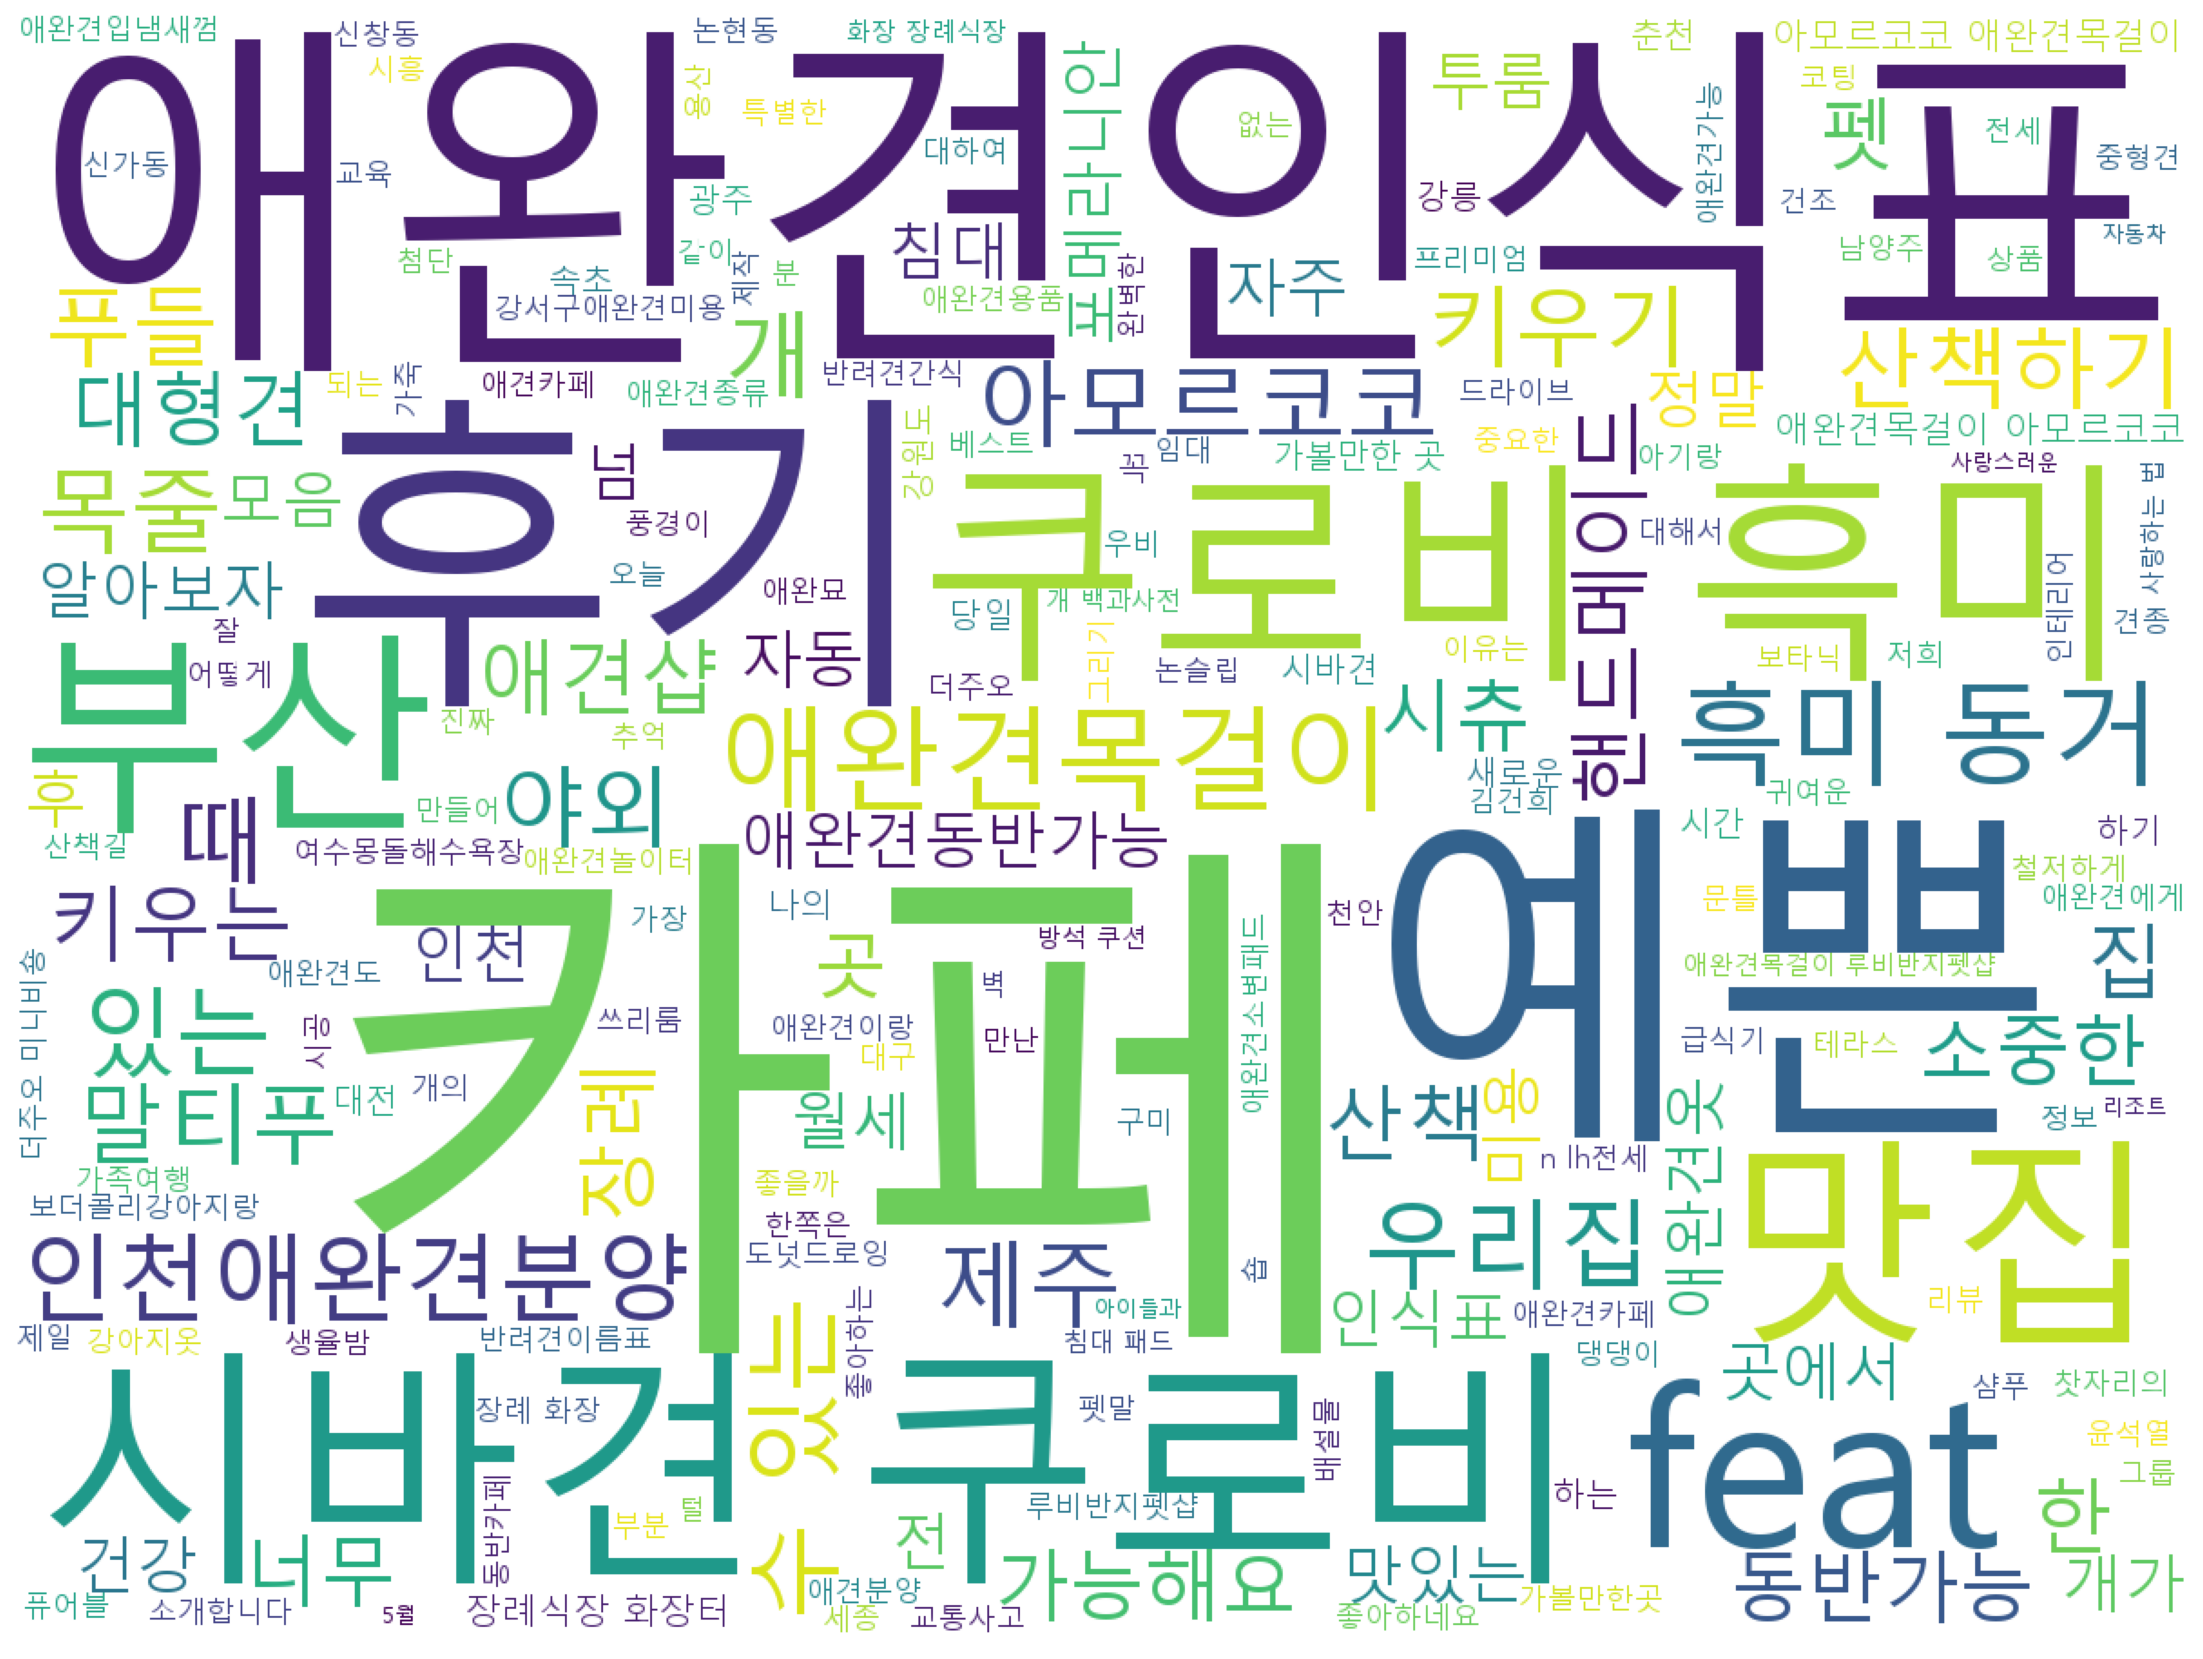

In [88]:
%time 
dangtrip_cloud = displayWordCloud(' '.join(df_noun_22))
dangtrip_cloud

## (2)21년 명사추출

In [89]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(blog_trip_21)
nouns_21 = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (248, 195) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 14 nouns are extracted
Wall time: 33.6 ms


In [90]:
nouns_21

{'원주': NounScore_v1(frequency=6, score=0.999867, known_r_ratio=0.5),
 '건강': NounScore_v1(frequency=8, score=0.7309443333333334, known_r_ratio=1.0),
 '아이': NounScore_v1(frequency=10, score=0.93776, known_r_ratio=0.9),
 '동반': NounScore_v1(frequency=39, score=0.9997962499999999, known_r_ratio=0.36363636363636365),
 '제주': NounScore_v1(frequency=9, score=0.505755, known_r_ratio=0.7142857142857143),
 '가능': NounScore_v1(frequency=28, score=0.9977473636363636, known_r_ratio=1.0),
 '함께': NounScore_v1(frequency=28, score=0.9820724000000001, known_r_ratio=0.625),
 '만족': NounScore_v1(frequency=4, score=0.6292945, known_r_ratio=1.0),
 '카페': NounScore_v1(frequency=29, score=0.997334, known_r_ratio=0.6666666666666666),
 '반려견': NounScore_v1(frequency=26, score=0.9996921999999999, known_r_ratio=0.7142857142857143),
 '애완견': NounScore_v1(frequency=309, score=0.8922900543478262, known_r_ratio=0.609271523178808),
 '강아지': NounScore_v1(frequency=36, score=0.93776, known_r_ratio=0.14285714285714285),
 '애완견사':

In [91]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun_21 = blog_trip_21.apply(preprocess)

In [92]:
df_noun_21

0                            +춘천,가평여행 애완견 동반 식당 호원닭갈비
2                     여행에 동반한 애완견 &amp; 고창 장어 맛집 금단양만
3            포항 [ 영일대 해수욕장 ] 여행 애완견과 차박하기 좋은 곳 예쁜... 
4                   강릉여행 / 세인트존스 호텔 숙박후기 (애완견 동반가능호텔)
5                           애완견 카시트 보니렌 펫시트 타고 함께 여행중
                            ...                      
934                                       애완견의 법칙-이현성
948                    애완견 출입 가능한 동천역 [카페 라심, La sim]
956                        애완견 런던으로 출국준비 / 영국 데려가는 방법
959    [양평] 애완견 출입 가능한 양평 &quot;문릿&quot; 카페 (MOONLIT)
970                        애완견 보금자리 메쉬 휀스 울타리 셀프 시공하기
Name: Title, Length: 450, dtype: object

Wall time: 0 ns


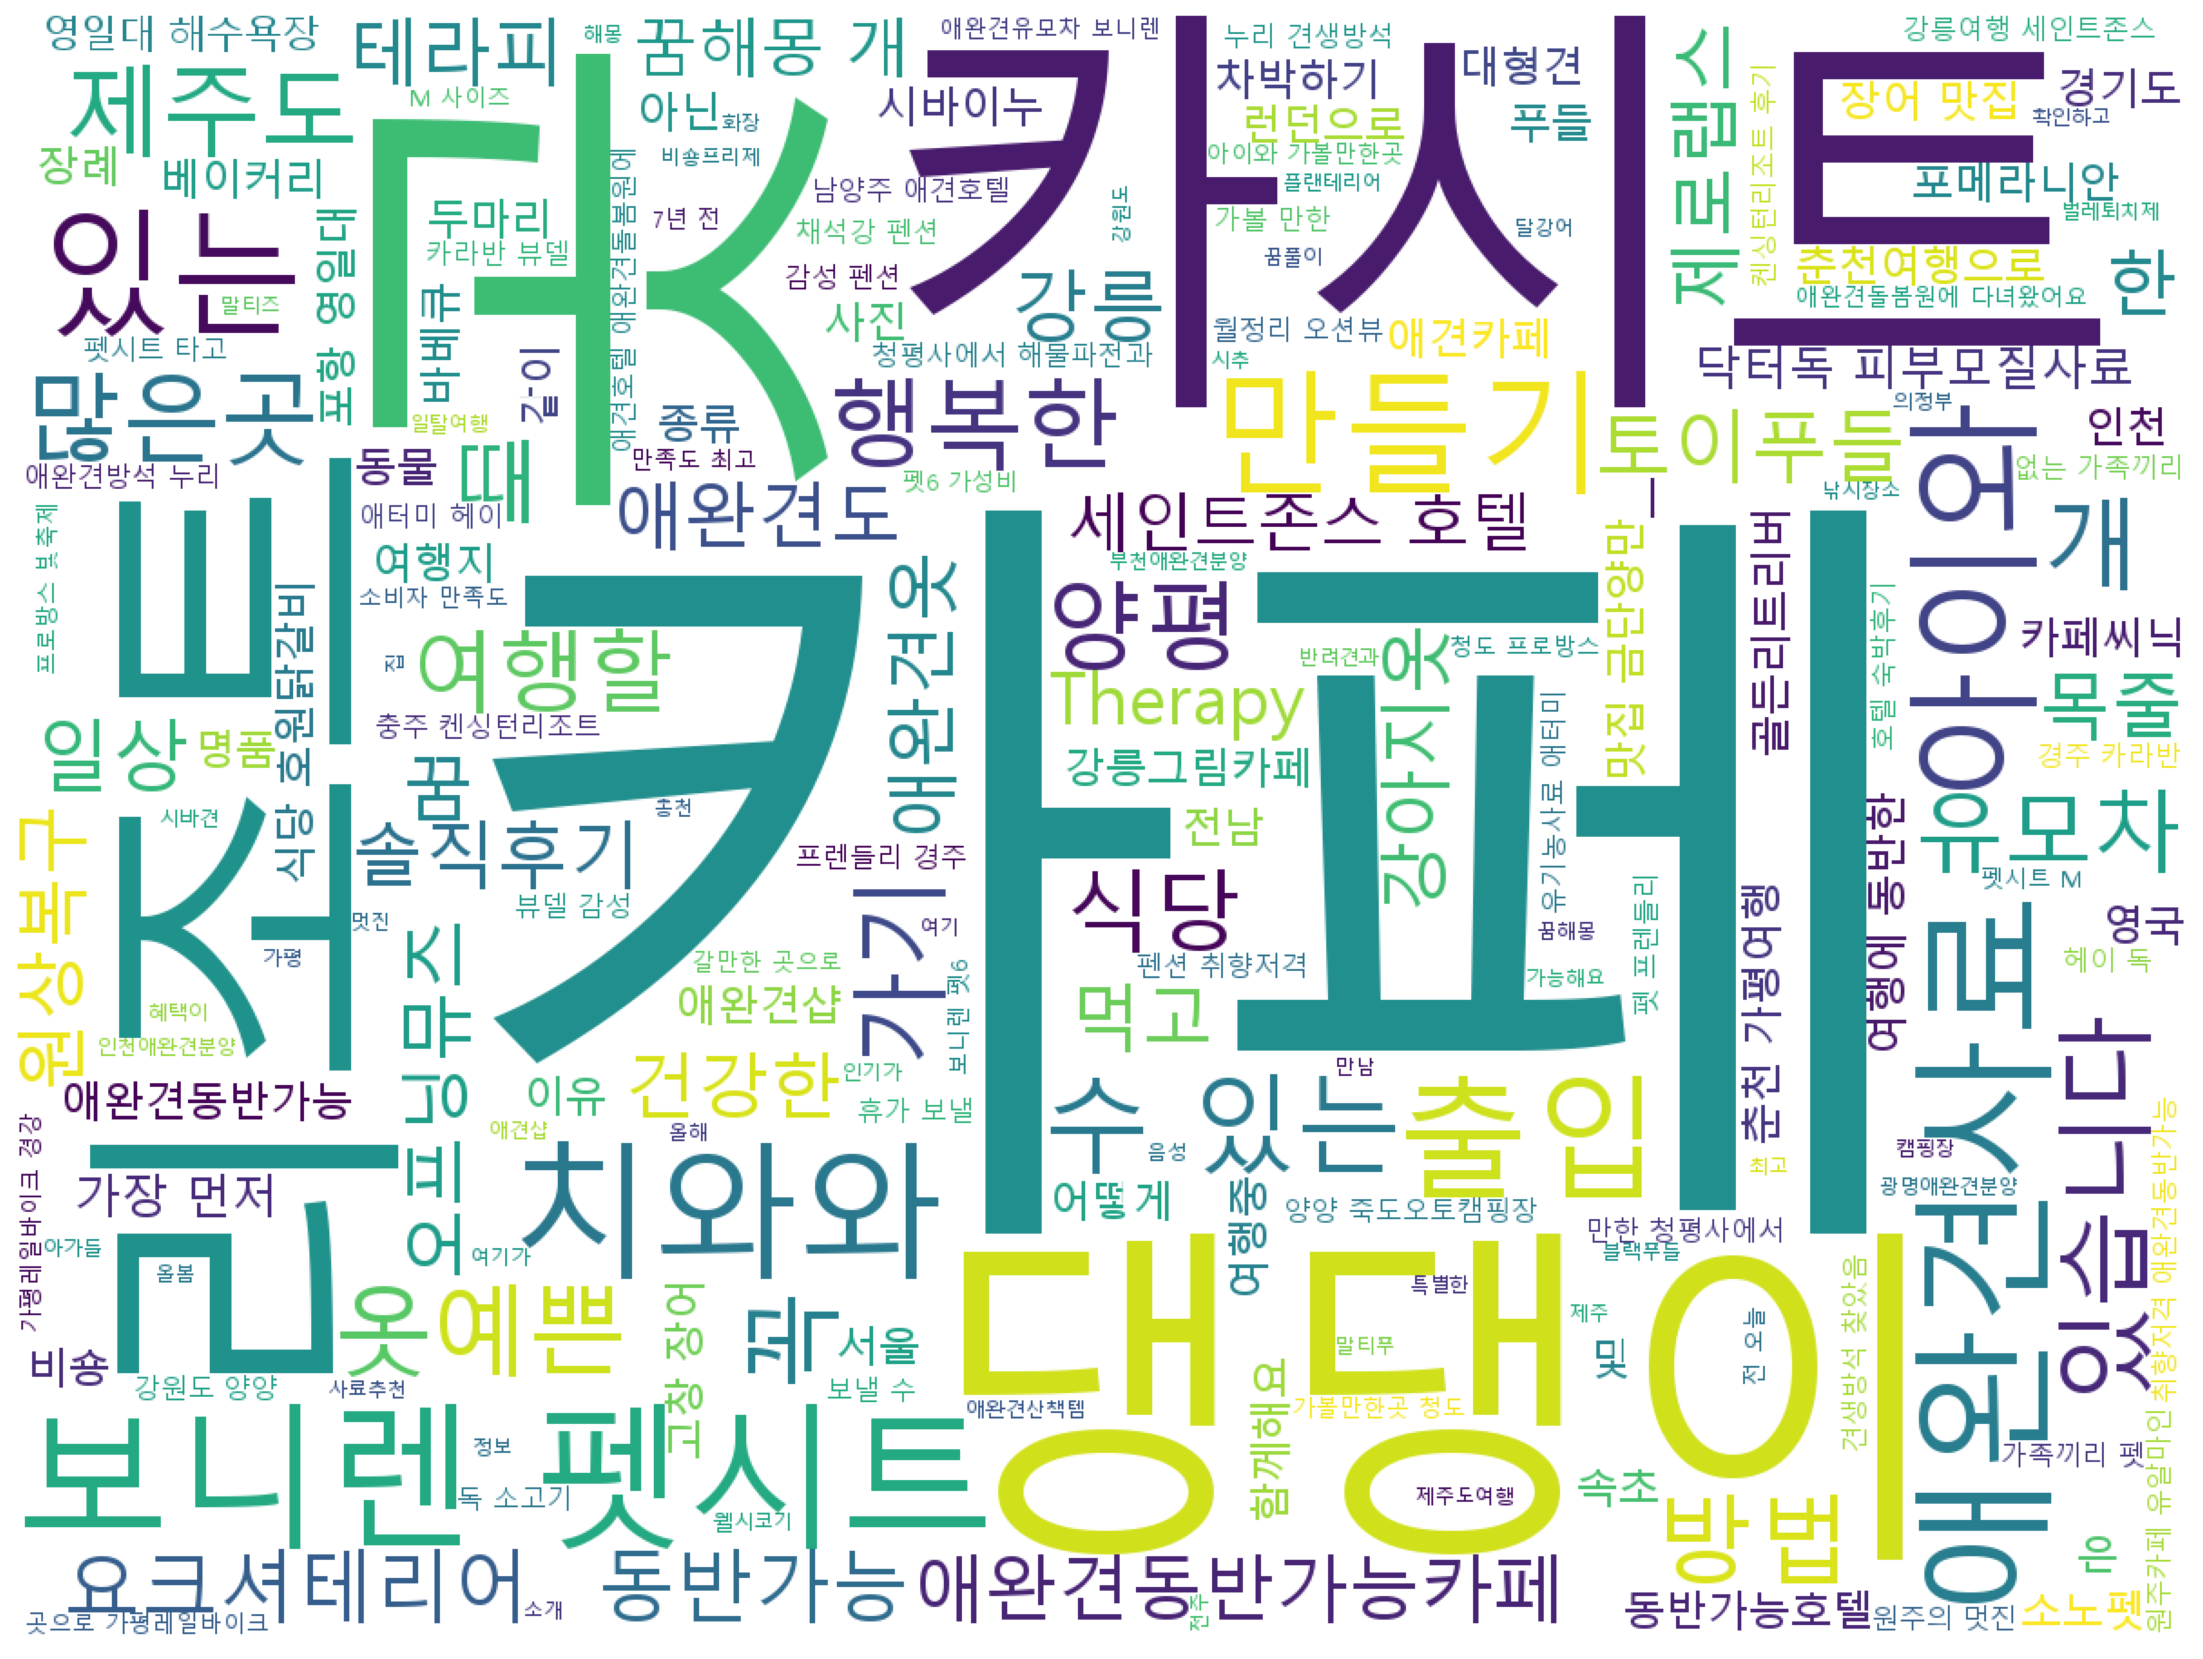

In [93]:
%time 
dangtrip_cloud = displayWordCloud(' '.join(df_noun_21))
dangtrip_cloud

## (2)20년 명사추출

In [94]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(blog_trip_20)
nouns_20 = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (122, 115) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 5 nouns are extracted
Wall time: 17.3 ms


In [95]:
nouns_20

{'산책': NounScore_v1(frequency=12, score=0.9433997777777778, known_r_ratio=1.0),
 '제주': NounScore_v1(frequency=9, score=0.505755, known_r_ratio=0.3333333333333333),
 '함께': NounScore_v1(frequency=14, score=0.99194725, known_r_ratio=1.0),
 '반려견': NounScore_v1(frequency=20, score=0.7027903999999999, known_r_ratio=0.7142857142857143),
 '애완견': NounScore_v1(frequency=180, score=0.811849074074074, known_r_ratio=0.7605633802816901)}

In [96]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun_20 = blog_trip_20.apply(preprocess)

In [97]:
df_noun_20

20             가평 어반 플레이스 카페. 애완견과 동행 여행. 반려견의 천국
24             [남양주여행] 애완견과 함께 당일치기 여행코스추천2 - 남양주
77     &lt;가족여행&gt;애완견과 같이 갈수있는 가족적인 분위기 글램핑장... 
102                   거제도복층펜션/까사델피노/애완견동반펜션/거제도여행
105            [캠핑여행] 애완견과 함께 캠핑-카라반 여행 - 캠핑여행추천3
                          ...                    
789         속초 영랑호, 반려견을 위한 애견운동장 애완견놀이터/애견동반... 
901            홍대애완견사진으로 소중한 기록남겨보기 ( 홍대반려견사진... 
931           애완동물그림 팝아트 애완묘 애완견 주말나들이 원데이클래스... 
992                     애완견 사육은 임대차계약  해지사유가 되나요?
998                         (삼진아웃-개 사형) 애완견 산책 금지
Name: Title, Length: 240, dtype: object

Wall time: 0 ns


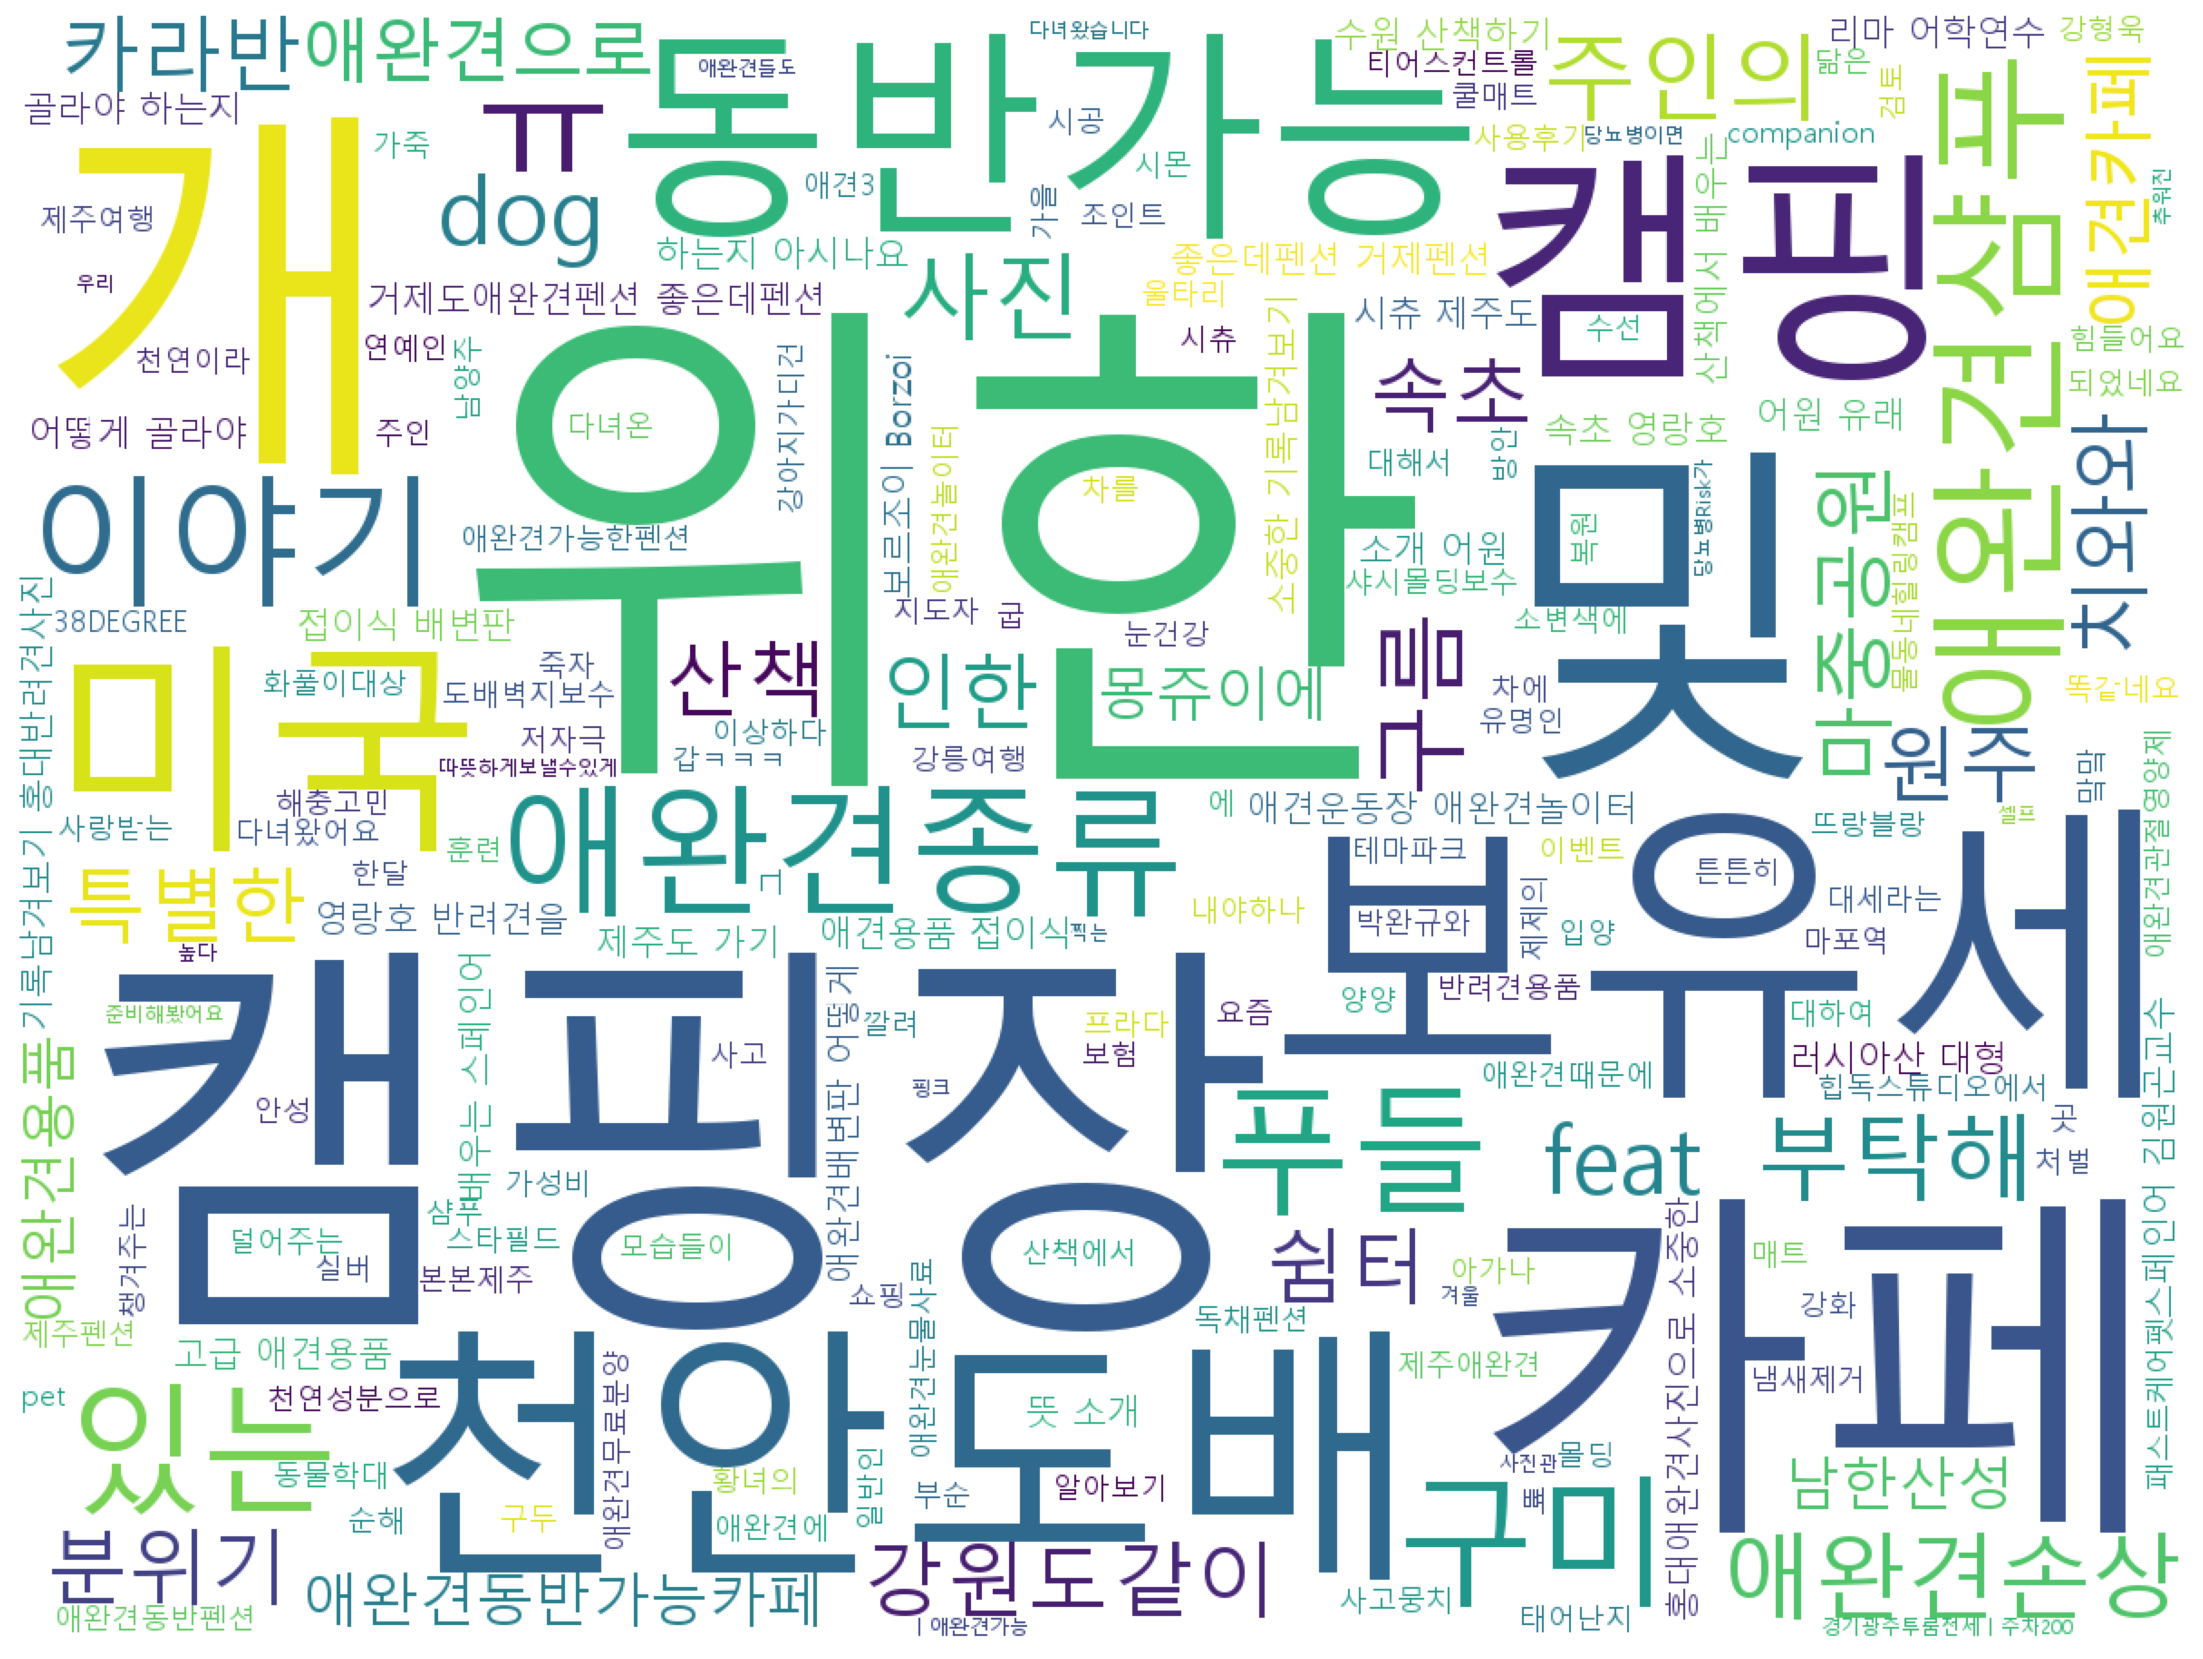

In [98]:
%time 
dangtrip_cloud_20 = displayWordCloud(' '.join(df_noun_20))
dangtrip_cloud_20

## (2)19년 명사추출

In [99]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(blog_trip_19)
nouns_19 = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (89, 73) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 5 nouns are extracted
Wall time: 14.5 ms


In [100]:
nouns_19

{'동반': NounScore_v1(frequency=13, score=0.8347083333333334, known_r_ratio=0.42857142857142855),
 '산책': NounScore_v1(frequency=6, score=0.997133, known_r_ratio=1.0),
 '제주': NounScore_v1(frequency=26, score=0.505755, known_r_ratio=0.96),
 '여행': NounScore_v1(frequency=18, score=0.9923495, known_r_ratio=1.0),
 '애완견': NounScore_v1(frequency=142, score=0.9833311333333333, known_r_ratio=0.8108108108108109)}

In [101]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun_19 = blog_trip_19.apply(preprocess)

In [102]:
df_noun_19

89          겨울 가족여행, 전주 한옥마을 애완견 나나랑 다녀왔어요:)
90     제주도 단체 여행, 애완견 동반 여행 제주해안휴양펜션! 5층... 
94                          필리핀 마닐라 애완견 해외여행
112        [목포여행]목포의 애완견 동반가능한 숙박-이코노미호텔 목포점
116               해외여행 시 애완견 고민! '독독'에 맡기세요!
                       ...                  
850         강아지 자동급식기, 혼자있을때 필요한 애완견 용품 사용방법
867       애완견 반려견과 함께 가평 남이섬 벚꽃축제, 벚꽃놀자 2019
899     [실천적 우리말_과학] 애완견 'ㄹ루나'와 함께 만든 확장_산책로
942         [시바견/시바이누] 애완견 발바닥밤, '파우수더' 사용후기
997        애완견 미용하기/바비온 이발기/ 우리집 치와와 미용했어요~~
Name: Title, Length: 165, dtype: object

Wall time: 0 ns


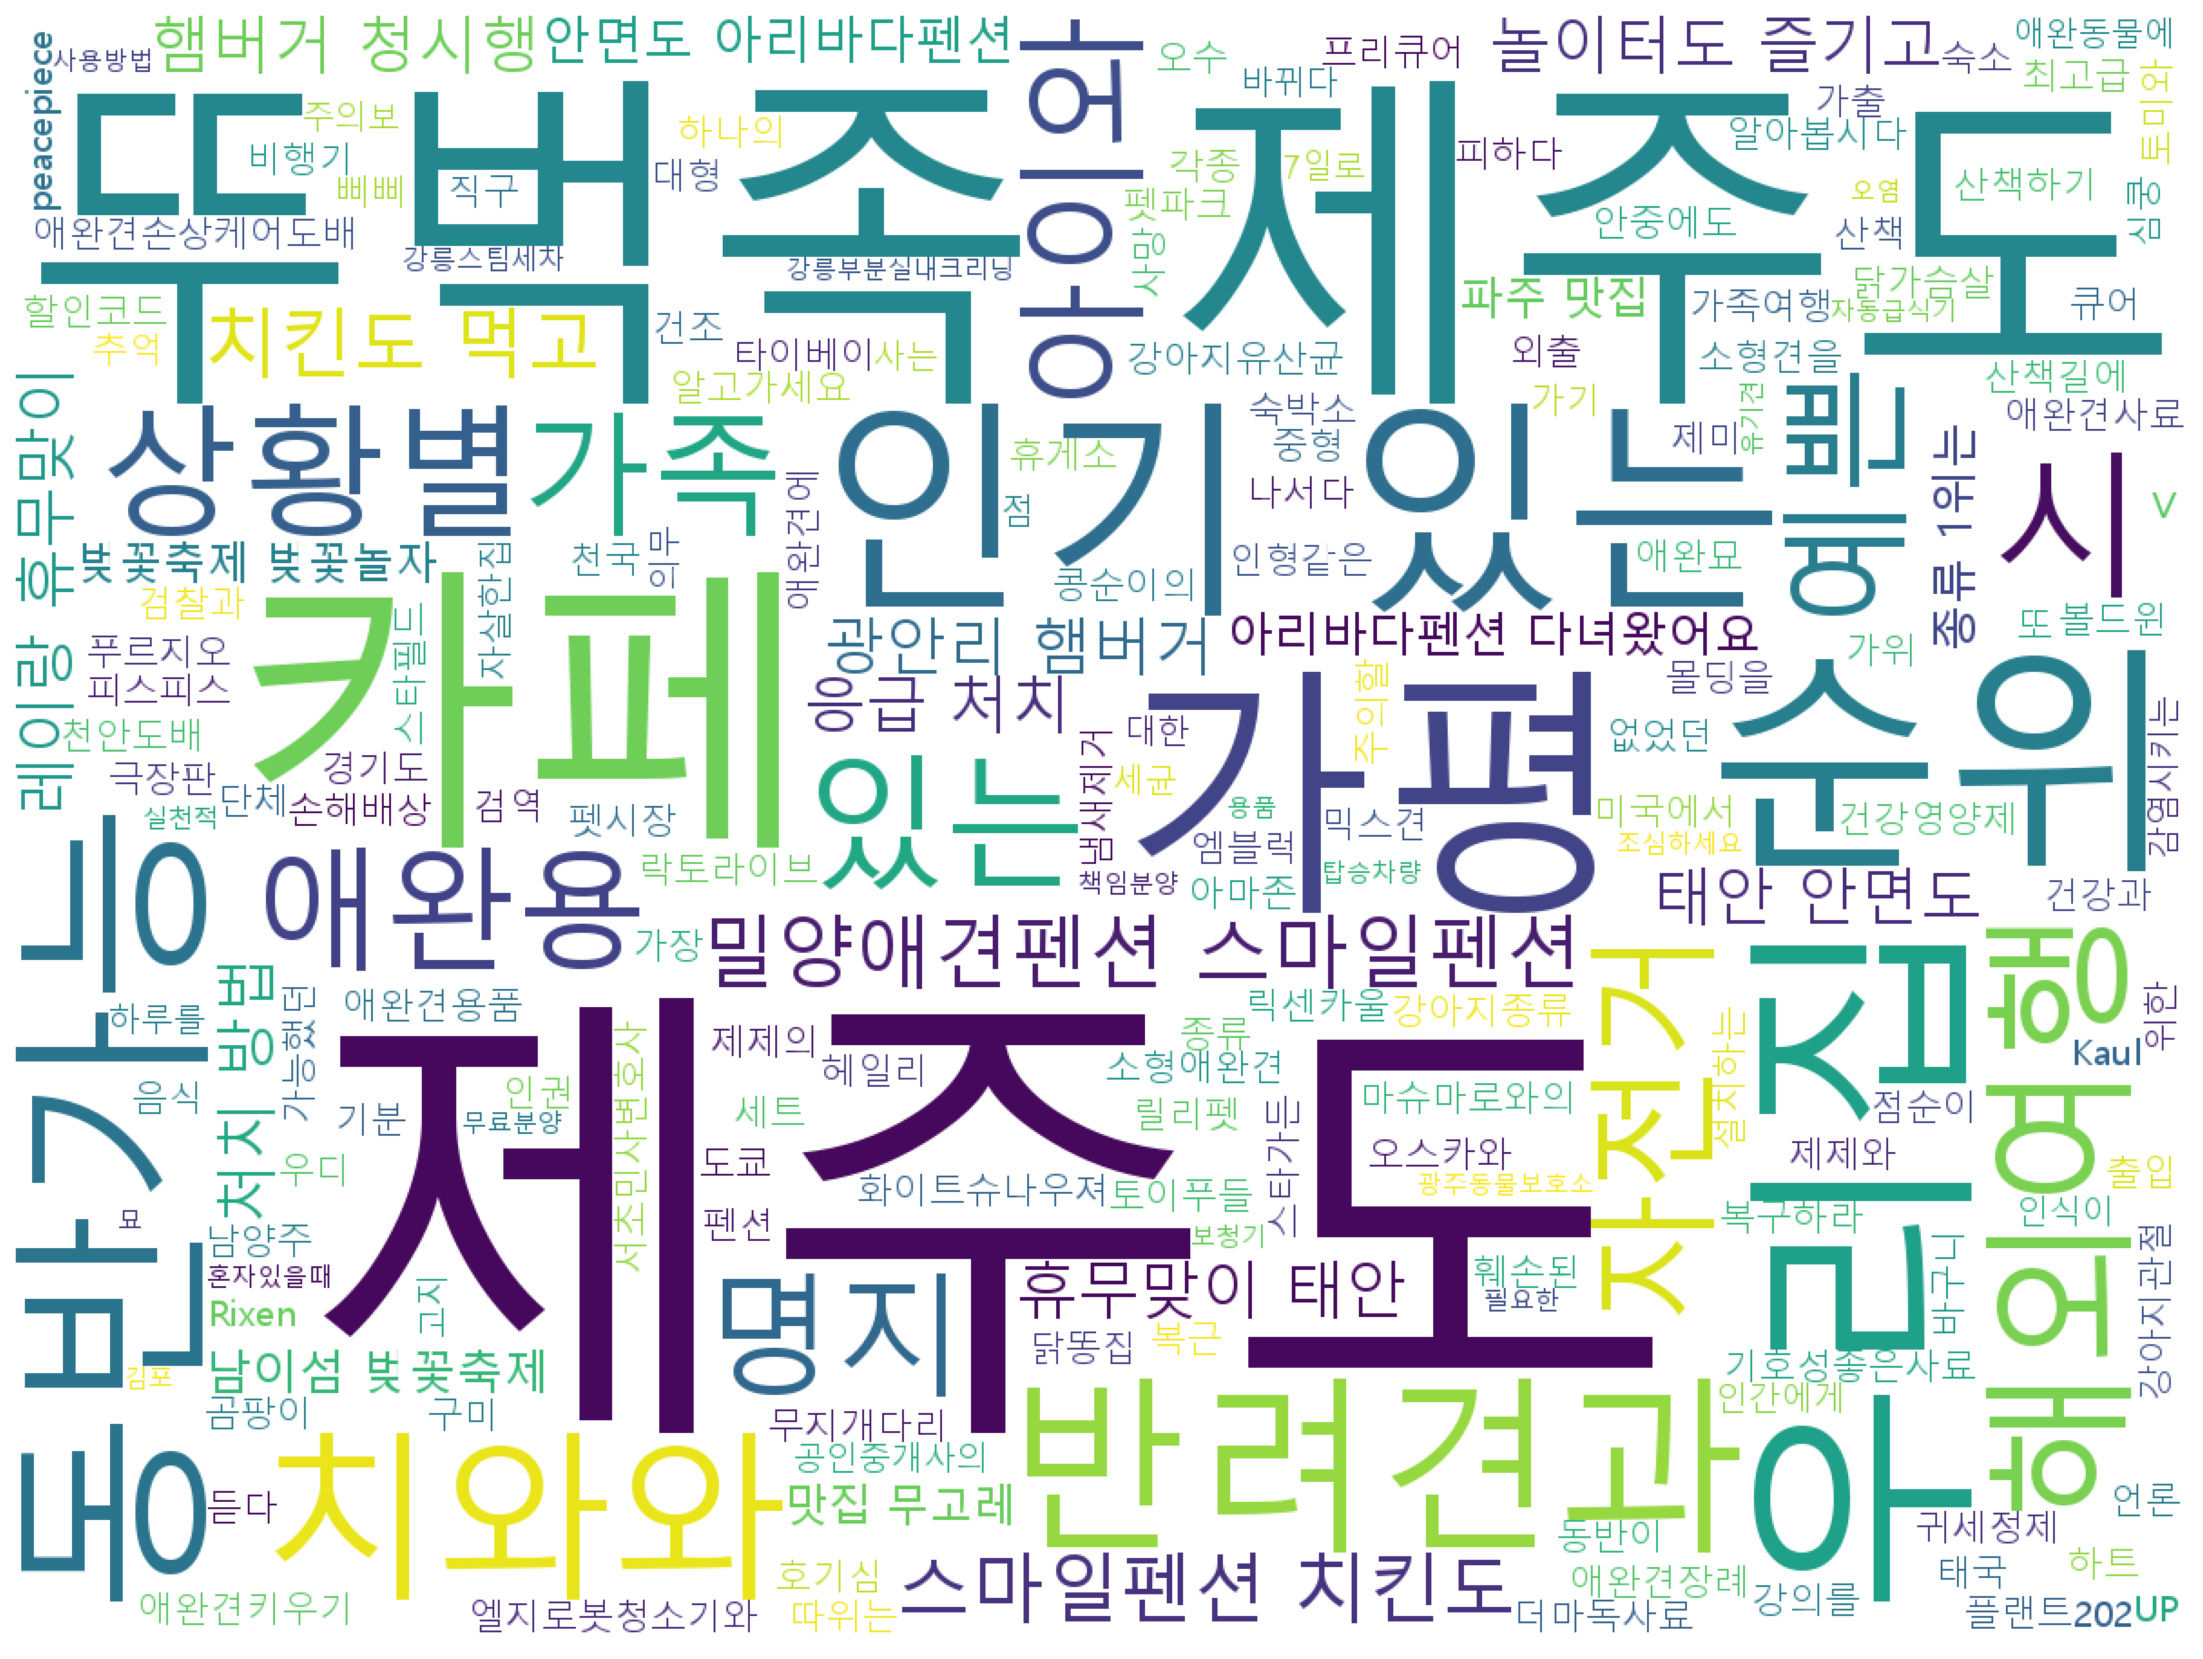

In [103]:
%time 
dangtrip_cloud_19 = displayWordCloud(' '.join(df_noun_19))
dangtrip_cloud_19